In [1]:
import random
import requests
import json
from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
import time 
import datetime 
import pandas as pd

In [3]:
sun_times = ["civil_twilight_begin","sunrise","solar_noon","sunset","astronomical_twilight_end"]

city_ids = []
cities = []
countries = []
lats = []
lons = []
temps = []
hums = []
clouds = []
winds = []

for k in range(len(sun_times)):
    city_ids.append([])
    cities.append([])
    countries.append([])
    lats.append([])
    lons.append([])
    temps.append([])
    hums.append([])
    clouds.append([])
    winds.append([])

i = 0

while i < 1000:
    
    #Random choice of latitude and longitude
    
    lat = random.choice(range(-90,91))
    lon = random.choice(range(-180,180))
    city_url = f"http://api.openweathermap.org/data/2.5/find?lat={lat}&lon={lon}&cnt=1&appid={api_key}&units=imperial"
    city_request = requests.get(city_url)
    
    #check if a city exists
    
    if city_request.status_code == 200:
        city_response = city_request.json()
        city_id = city_response['list'][0]['id']
        
        #check if a city is unique
        
        if city_id not in city_ids[0]:
            sun_url = f"https://api.sunrise-sunset.org/json?lat={city_response['list'][0]['coord']['lat']}&lng={city_response['list'][0]['coord']['lon']}&date=yesterday&formatted=0"
            sun_request = requests.get(sun_url)
            
            #check if suntimes exists
            
            if sun_request.status_code == 200:
                sun_response = sun_request.json()
                time_responses = []
                for sun_time in sun_times:
                    date_string = sun_response["results"][sun_time]
                    date = datetime.datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S+00:00")
                    time_tuple = date.timetuple()
                    sun_time_relative = int(time.mktime(time_tuple))
                    sun_time_absolute = sun_time_relative - 3600*8
                    time_url = f"http://api.openweathermap.org/data/2.5/onecall/timemachine?lat={city_response['list'][0]['coord']['lat']}&lon={city_response['list'][0]['coord']['lon']}&dt={sun_time_absolute}&appid={api_key}&units=imperial"
                    time_request = requests.get(time_url)
                    
                    #check if yesterday's weather data exists
                    
                    if time_request.status_code == 200:
                        time_responses.append(time_request.json())
                
                #check if all of yesterday's weather data exists
                
                if len(time_responses) == len(sun_times):
                    print("")
                    print(f"{i} : {city_response['list'][0]['name']} {city_response['list'][0]['sys']['country']} : ({city_response['list'][0]['coord']['lat']},{city_response['list'][0]['coord']['lon']})")
                    print("")
                    j = -1
                    for time_response in time_responses:
                        j = j + 1
                        city_ids[j].append(city_response['list'][0]['id'])
                        cities[j].append(city_response['list'][0]['name'])
                        countries[j].append(city_response['list'][0]['sys']['country'])
                        lats[j].append(city_response['list'][0]['coord']['lat'])
                        lons[j].append(city_response['list'][0]['coord']['lon'])
                        temps[j].append(time_response["current"]["temp"])
                        hums[j].append(time_response["current"]["humidity"])
                        clouds[j].append(time_response["current"]["clouds"])
                        winds[j].append(time_response["current"]["wind_speed"])
                        print(f"{sun_times[j]} Temperature : {temps[j][i]} F")
                    print("--------------------------------")
                    i = i + 1




0 : Razdolinsk RU : (58.4211,94.6658)

civil_twilight_begin Temperature : -24 F
sunrise Temperature : -24.74 F
solar_noon Temperature : -11 F
sunset Temperature : -16.29 F
astronomical_twilight_end Temperature : -17.93 F
--------------------------------

1 : Siculiana IT : (37.3344,13.4216)

civil_twilight_begin Temperature : 47.61 F
sunrise Temperature : 46.29 F
solar_noon Temperature : 57.54 F
sunset Temperature : 52.21 F
astronomical_twilight_end Temperature : 49.33 F
--------------------------------

2 : Tomskaya RU : (58.7844,64.1901)

civil_twilight_begin Temperature : -11.27 F
sunrise Temperature : -13.68 F
solar_noon Temperature : -9.26 F
sunset Temperature : -15.52 F
astronomical_twilight_end Temperature : -17.48 F
--------------------------------

3 : Holman CA : (70.7342,-117.7546)

civil_twilight_begin Temperature : -20.2 F
sunrise Temperature : -22 F
solar_noon Temperature : -22 F
sunset Temperature : -15.21 F
astronomical_twilight_end Temperature : -15.68 F
-------------


33 : Ayagoz KZ : (47.9714,80.4392)

civil_twilight_begin Temperature : 17.58 F
sunrise Temperature : 18.34 F
solar_noon Temperature : 23.45 F
sunset Temperature : 18.16 F
astronomical_twilight_end Temperature : 14.2 F
--------------------------------

34 : Obed CA : (53.5501,-117.2356)

civil_twilight_begin Temperature : 37.4 F
sunrise Temperature : 37.4 F
solar_noon Temperature : 46.4 F
sunset Temperature : 44.6 F
astronomical_twilight_end Temperature : 42.8 F
--------------------------------

35 : Turan RU : (52.1453,93.9192)

civil_twilight_begin Temperature : -8.46 F
sunrise Temperature : -9.72 F
solar_noon Temperature : 9.59 F
sunset Temperature : 3.61 F
astronomical_twilight_end Temperature : 2.23 F
--------------------------------

36 : Moanflugh IE : (51.9678,-8.9825)

civil_twilight_begin Temperature : 43.65 F
sunrise Temperature : 43.97 F
solar_noon Temperature : 48.88 F
sunset Temperature : 45.3 F
astronomical_twilight_end Temperature : 43.43 F
-----------------------------


66 : Radishchevo RU : (52.85,47.8833)

civil_twilight_begin Temperature : -14.35 F
sunrise Temperature : -15 F
solar_noon Temperature : -0.51 F
sunset Temperature : 0.05 F
astronomical_twilight_end Temperature : -1.39 F
--------------------------------

67 : Sabun SS : (4.5361,29.2578)

civil_twilight_begin Temperature : 65.12 F
sunrise Temperature : 65.12 F
solar_noon Temperature : 93.4 F
sunset Temperature : 87.26 F
astronomical_twilight_end Temperature : 81.34 F
--------------------------------

68 : Tramandaí BR : (-29.9847,-50.1336)

civil_twilight_begin Temperature : 70.23 F
sunrise Temperature : 70.23 F
solar_noon Temperature : 79.47 F
sunset Temperature : 75.99 F
astronomical_twilight_end Temperature : 75.7 F
--------------------------------

69 : Chunskiy RU : (56.0815,99.6342)

civil_twilight_begin Temperature : -12.03 F
sunrise Temperature : -12.53 F
solar_noon Temperature : -1.62 F
sunset Temperature : -6.9 F
astronomical_twilight_end Temperature : -7.46 F
----------------


99 : Meulaboh ID : (4.1363,96.1285)

civil_twilight_begin Temperature : 78.15 F
sunrise Temperature : 78.17 F
solar_noon Temperature : 87.42 F
sunset Temperature : 81.48 F
astronomical_twilight_end Temperature : 80.83 F
--------------------------------

100 : Pedregal VE : (11.0204,-70.1206)

civil_twilight_begin Temperature : 67.86 F
sunrise Temperature : 67.86 F
solar_noon Temperature : 90.37 F
sunset Temperature : 79.9 F
astronomical_twilight_end Temperature : 75.7 F
--------------------------------

101 : Salmās IR : (38.1973,44.7653)

civil_twilight_begin Temperature : 24.8 F
sunrise Temperature : 24.8 F
solar_noon Temperature : 33.8 F
sunset Temperature : 30.2 F
astronomical_twilight_end Temperature : 26.6 F
--------------------------------

102 : Xingao CN : (39.0261,112.9616)

civil_twilight_begin Temperature : 42.42 F
sunrise Temperature : 42.42 F
solar_noon Temperature : 58.62 F
sunset Temperature : 55.53 F
astronomical_twilight_end Temperature : 51.06 F
--------------------


132 : Çandarlı TR : (38.935,26.934)

civil_twilight_begin Temperature : 37.83 F
sunrise Temperature : 38.5 F
solar_noon Temperature : 50.43 F
sunset Temperature : 50 F
astronomical_twilight_end Temperature : 47.8 F
--------------------------------

133 : Marhoum DZ : (34.4468,-0.1947)

civil_twilight_begin Temperature : 51.12 F
sunrise Temperature : 50.31 F
solar_noon Temperature : 64.13 F
sunset Temperature : 48.87 F
astronomical_twilight_end Temperature : 48.36 F
--------------------------------

134 : Rjukan NO : (59.8789,8.5941)

civil_twilight_begin Temperature : 35.78 F
sunrise Temperature : 35.38 F
solar_noon Temperature : 36.63 F
sunset Temperature : 36.68 F
astronomical_twilight_end Temperature : 35.73 F
--------------------------------

135 : Staryy Nadym RU : (65.6118,72.6842)

civil_twilight_begin Temperature : -36.38 F
sunrise Temperature : -36.78 F
solar_noon Temperature : -27.53 F
sunset Temperature : -28.48 F
astronomical_twilight_end Temperature : -28.17 F
-----------


164 : Kapadvanj IN : (23.0167,73.0667)

civil_twilight_begin Temperature : 64.4 F
sunrise Temperature : 64.4 F
solar_noon Temperature : 91.26 F
sunset Temperature : 86 F
astronomical_twilight_end Temperature : 77 F
--------------------------------

165 : Upernavik GL : (72.7868,-56.1549)

civil_twilight_begin Temperature : -22.29 F
sunrise Temperature : -22.23 F
solar_noon Temperature : -20.58 F
sunset Temperature : -19.77 F
astronomical_twilight_end Temperature : -19.53 F
--------------------------------

166 : Ovoot MN : (45.3042,113.8498)

civil_twilight_begin Temperature : 18.19 F
sunrise Temperature : 18.19 F
solar_noon Temperature : 15.89 F
sunset Temperature : 10.22 F
astronomical_twilight_end Temperature : 1.85 F
--------------------------------

167 : Rawlins US : (41.7911,-107.2387)

civil_twilight_begin Temperature : 12.51 F
sunrise Temperature : 13.62 F
solar_noon Temperature : 24.26 F
sunset Temperature : 23 F
astronomical_twilight_end Temperature : 22.06 F
--------------


197 : Fort Good Hope CA : (66.257,-128.6374)

civil_twilight_begin Temperature : -36.4 F
sunrise Temperature : -36.4 F
solar_noon Temperature : -18.72 F
sunset Temperature : -25.8 F
astronomical_twilight_end Temperature : -28.97 F
--------------------------------

198 : Balabac PH : (7.9868,117.0645)

civil_twilight_begin Temperature : 76.53 F
sunrise Temperature : 76.53 F
solar_noon Temperature : 80.64 F
sunset Temperature : 79.07 F
astronomical_twilight_end Temperature : 79.38 F
--------------------------------

199 : Kali ID : (1.1627,121.4278)

civil_twilight_begin Temperature : 76.14 F
sunrise Temperature : 76.14 F
solar_noon Temperature : 84.24 F
sunset Temperature : 79.72 F
astronomical_twilight_end Temperature : 79.02 F
--------------------------------

200 : Summerfield US : (29.0086,-82.0348)

civil_twilight_begin Temperature : 46.78 F
sunrise Temperature : 47.1 F
solar_noon Temperature : 70.52 F
sunset Temperature : 65.97 F
astronomical_twilight_end Temperature : 62.29 F
--


230 : Changning CN : (35.9798,110.8221)

civil_twilight_begin Temperature : 38.61 F
sunrise Temperature : 38.61 F
solar_noon Temperature : 56.52 F
sunset Temperature : 54.34 F
astronomical_twilight_end Temperature : 49.82 F
--------------------------------

231 : Aitape PG : (-3.1374,142.3475)

civil_twilight_begin Temperature : 79.02 F
sunrise Temperature : 78.84 F
solar_noon Temperature : 85.39 F
sunset Temperature : 82.17 F
astronomical_twilight_end Temperature : 81.3 F
--------------------------------

232 : Ihbulag MN : (43.2,107.2)

civil_twilight_begin Temperature : 36.88 F
sunrise Temperature : 36.27 F
solar_noon Temperature : 42.01 F
sunset Temperature : 34.05 F
astronomical_twilight_end Temperature : 33.06 F
--------------------------------

233 : Tabuk SA : (27.5,37.3333)

civil_twilight_begin Temperature : 39.97 F
sunrise Temperature : 39.97 F
solar_noon Temperature : 55.11 F
sunset Temperature : 56.89 F
astronomical_twilight_end Temperature : 53.64 F
---------------------


263 : Western Isles GB : (57.6667,-7.1667)

civil_twilight_begin Temperature : 45.72 F
sunrise Temperature : 45.25 F
solar_noon Temperature : 46.63 F
sunset Temperature : 44.8 F
astronomical_twilight_end Temperature : 44.8 F
--------------------------------

264 : Kuujjuarapik CA : (55.2836,-77.7495)

civil_twilight_begin Temperature : 8.6 F
sunrise Temperature : 8.6 F
solar_noon Temperature : 23 F
sunset Temperature : 23 F
astronomical_twilight_end Temperature : 21.2 F
--------------------------------

265 : Los Garza MX : (28.0833,-100.3667)

civil_twilight_begin Temperature : 47.19 F
sunrise Temperature : 47.3 F
solar_noon Temperature : 64.36 F
sunset Temperature : 65.64 F
astronomical_twilight_end Temperature : 61.86 F
--------------------------------

266 : Huangtang CN : (26.0394,112.035)

civil_twilight_begin Temperature : 55.42 F
sunrise Temperature : 55.42 F
solar_noon Temperature : 70.63 F
sunset Temperature : 68.32 F
astronomical_twilight_end Temperature : 65.19 F
---------


296 : Arctic Bay CA : (73.0347,-85.1663)

civil_twilight_begin Temperature : -11.2 F
sunrise Temperature : -11.2 F
solar_noon Temperature : -11.2 F
sunset Temperature : -13 F
astronomical_twilight_end Temperature : -18.4 F
--------------------------------

297 : La Paz MX : (24.1333,-110.3)

civil_twilight_begin Temperature : 57.06 F
sunrise Temperature : 44.6 F
solar_noon Temperature : 72.75 F
sunset Temperature : 65.17 F
astronomical_twilight_end Temperature : 64.2 F
--------------------------------

298 : Kingman US : (35.1894,-114.053)

civil_twilight_begin Temperature : 41.95 F
sunrise Temperature : 41.11 F
solar_noon Temperature : 57.31 F
sunset Temperature : 55.8 F
astronomical_twilight_end Temperature : 52.61 F
--------------------------------

299 : Bongandanga CD : (1.5,21.05)

civil_twilight_begin Temperature : 66.63 F
sunrise Temperature : 67.57 F
solar_noon Temperature : 100.67 F
sunset Temperature : 83.21 F
astronomical_twilight_end Temperature : 80.51 F
----------------


329 : Huaicheng CN : (23.9051,112.1931)

civil_twilight_begin Temperature : 59.41 F
sunrise Temperature : 59.41 F
solar_noon Temperature : 81.28 F
sunset Temperature : 73.18 F
astronomical_twilight_end Temperature : 71.31 F
--------------------------------

330 : Borki RU : (58.4858,92.0823)

civil_twilight_begin Temperature : -25.92 F
sunrise Temperature : -26.48 F
solar_noon Temperature : -10.43 F
sunset Temperature : -11.07 F
astronomical_twilight_end Temperature : -12.42 F
--------------------------------

331 : Farrukhnagar IN : (17.0778,78.2011)

civil_twilight_begin Temperature : 65.73 F
sunrise Temperature : 65.35 F
solar_noon Temperature : 79.52 F
sunset Temperature : 76.78 F
astronomical_twilight_end Temperature : 75.81 F
--------------------------------

332 : Laverton AU : (-28.6333,122.4167)

civil_twilight_begin Temperature : 70.65 F
sunrise Temperature : 69.98 F
solar_noon Temperature : 87.46 F
sunset Temperature : 83.79 F
astronomical_twilight_end Temperature : 82.51 F


362 : Ulaan-Uul MN : (46.0674,100.8172)

civil_twilight_begin Temperature : 14.74 F
sunrise Temperature : 14.74 F
solar_noon Temperature : 26.22 F
sunset Temperature : 15.21 F
astronomical_twilight_end Temperature : 11.53 F
--------------------------------

363 : Novyy Uoyan RU : (56.1572,111.7056)

civil_twilight_begin Temperature : -7.15 F
sunrise Temperature : -6.11 F
solar_noon Temperature : 0.84 F
sunset Temperature : -3.28 F
astronomical_twilight_end Temperature : -5.01 F
--------------------------------

364 : Rochfort Bridge CA : (53.9169,-115.0355)

civil_twilight_begin Temperature : 39.2 F
sunrise Temperature : 42.8 F
solar_noon Temperature : 42.8 F
sunset Temperature : 44.6 F
astronomical_twilight_end Temperature : 42.8 F
--------------------------------

365 : Havoysund NO : (70.9963,24.6622)

civil_twilight_begin Temperature : 12.2 F
sunrise Temperature : 14 F
solar_noon Temperature : 12.2 F
sunset Temperature : 12.2 F
astronomical_twilight_end Temperature : 10.4 F
------


395 : Ashdod IL : (31.8167,34.65)

civil_twilight_begin Temperature : 43.59 F
sunrise Temperature : 43.05 F
solar_noon Temperature : 60.12 F
sunset Temperature : 55.71 F
astronomical_twilight_end Temperature : 52.25 F
--------------------------------

396 : Coral Harbour CA : (64.1341,-83.1662)

civil_twilight_begin Temperature : 5 F
sunrise Temperature : 5 F
solar_noon Temperature : 6.8 F
sunset Temperature : 1.4 F
astronomical_twilight_end Temperature : 1.4 F
--------------------------------

397 : Wainwright US : (70.6369,-160.0383)

civil_twilight_begin Temperature : -15.11 F
sunrise Temperature : -14.44 F
solar_noon Temperature : -13.97 F
sunset Temperature : -11.79 F
astronomical_twilight_end Temperature : -13.16 F
--------------------------------

398 : Novaya Derevnya RU : (63.9011,38.0602)

civil_twilight_begin Temperature : -20.92 F
sunrise Temperature : -21.48 F
solar_noon Temperature : -13.74 F
sunset Temperature : -15.38 F
astronomical_twilight_end Temperature : -21.84 F



428 : Xinzhai CN : (36.9428,107.9476)

civil_twilight_begin Temperature : 39.85 F
sunrise Temperature : 39.85 F
solar_noon Temperature : 56.88 F
sunset Temperature : 49.84 F
astronomical_twilight_end Temperature : 48.69 F
--------------------------------

429 : Chalabre FR : (42.9825,2.0054)

civil_twilight_begin Temperature : 48.81 F
sunrise Temperature : 49.87 F
solar_noon Temperature : 56.37 F
sunset Temperature : 53.19 F
astronomical_twilight_end Temperature : 53.46 F
--------------------------------

430 : Inongo CD : (-1.95,18.2667)

civil_twilight_begin Temperature : 72.84 F
sunrise Temperature : 72.84 F
solar_noon Temperature : 80.35 F
sunset Temperature : 82.06 F
astronomical_twilight_end Temperature : 80.62 F
--------------------------------

431 : San-Pédro CI : (4.7485,-6.6363)

civil_twilight_begin Temperature : 74.71 F
sunrise Temperature : 74.3 F
solar_noon Temperature : 81.12 F
sunset Temperature : 79.61 F
astronomical_twilight_end Temperature : 79.09 F
---------------


461 : Belogor’ye KZ : (51.5297,77.4714)

civil_twilight_begin Temperature : -5.19 F
sunrise Temperature : -4.67 F
solar_noon Temperature : 11.59 F
sunset Temperature : 8.69 F
astronomical_twilight_end Temperature : 8.42 F
--------------------------------

462 : Hofn IS : (64.2539,-15.2082)

civil_twilight_begin Temperature : 39.2 F
sunrise Temperature : 39.65 F
solar_noon Temperature : 42.8 F
sunset Temperature : 40.91 F
astronomical_twilight_end Temperature : 41.36 F
--------------------------------

463 : Oeiras BR : (-7.0253,-42.1311)

civil_twilight_begin Temperature : 69.22 F
sunrise Temperature : 69.22 F
solar_noon Temperature : 89.35 F
sunset Temperature : 78.55 F
astronomical_twilight_end Temperature : 75.85 F
--------------------------------

464 : Qikiqtarjuaq CA : (67.5555,-64.0249)

civil_twilight_begin Temperature : -22 F
sunrise Temperature : -25.6 F
solar_noon Temperature : -18.4 F
sunset Temperature : -20.2 F
astronomical_twilight_end Temperature : -20.2 F
------------


494 : Galheiro BR : (-18.9667,-51.95)

civil_twilight_begin Temperature : 66.65 F
sunrise Temperature : 66.65 F
solar_noon Temperature : 87.53 F
sunset Temperature : 79.66 F
astronomical_twilight_end Temperature : 78.78 F
--------------------------------

495 : Marvel Loch AU : (-31.4667,119.4667)

civil_twilight_begin Temperature : 64.45 F
sunrise Temperature : 63.57 F
solar_noon Temperature : 88.68 F
sunset Temperature : 83.68 F
astronomical_twilight_end Temperature : 82.11 F
--------------------------------

496 : Ilulissat GL : (69.2167,-51.1)

civil_twilight_begin Temperature : 3.2 F
sunrise Temperature : 3.2 F
solar_noon Temperature : 6.8 F
sunset Temperature : 6.8 F
astronomical_twilight_end Temperature : 6.8 F
--------------------------------

497 : Nanma CN : (36.1817,118.1583)

civil_twilight_begin Temperature : 48 F
sunrise Temperature : 46.71 F
solar_noon Temperature : 66.7 F
sunset Temperature : 63.34 F
astronomical_twilight_end Temperature : 62.1 F
----------------------


527 : Batalha BR : (-4.025,-42.075)

civil_twilight_begin Temperature : 70.38 F
sunrise Temperature : 70.38 F
solar_noon Temperature : 88.05 F
sunset Temperature : 78.39 F
astronomical_twilight_end Temperature : 76.14 F
--------------------------------

528 : Omskiy RU : (57.6356,91.9072)

civil_twilight_begin Temperature : -20.54 F
sunrise Temperature : -21.08 F
solar_noon Temperature : -4.95 F
sunset Temperature : -6.14 F
astronomical_twilight_end Temperature : -7.28 F
--------------------------------

529 : Yumen CN : (40.2833,97.2)

civil_twilight_begin Temperature : 29.71 F
sunrise Temperature : 29.71 F
solar_noon Temperature : 47.12 F
sunset Temperature : 45.18 F
astronomical_twilight_end Temperature : 42.08 F
--------------------------------

530 : Ouargla Province DZ : (30.5,6.1667)

civil_twilight_begin Temperature : 60.15 F
sunrise Temperature : 60.15 F
solar_noon Temperature : 80.67 F
sunset Temperature : 79.23 F
astronomical_twilight_end Temperature : 74.77 F
-------------


560 : Kelaniya LK : (6.9553,79.922)

civil_twilight_begin Temperature : 75.2 F
sunrise Temperature : 77 F
solar_noon Temperature : 86 F
sunset Temperature : 80.6 F
astronomical_twilight_end Temperature : 78.8 F
--------------------------------

561 : Qümong CN : (32.9777,98.098)

civil_twilight_begin Temperature : 2.88 F
sunrise Temperature : 2.88 F
solar_noon Temperature : 28.58 F
sunset Temperature : 21.09 F
astronomical_twilight_end Temperature : 17.49 F
--------------------------------

562 : Tilpa AU : (-30.95,144.4)

civil_twilight_begin Temperature : 79.43 F
sunrise Temperature : 79.43 F
solar_noon Temperature : 97.45 F
sunset Temperature : 92.79 F
astronomical_twilight_end Temperature : 91.04 F
--------------------------------

563 : Annau TM : (37.8876,58.516)

civil_twilight_begin Temperature : 32 F
sunrise Temperature : 30.2 F
solar_noon Temperature : 44.6 F
sunset Temperature : 46.4 F
astronomical_twilight_end Temperature : 44.6 F
--------------------------------

564 : Ma


593 : Lake Brownwood US : (31.8357,-99.0078)

civil_twilight_begin Temperature : 48.99 F
sunrise Temperature : 49.33 F
solar_noon Temperature : 67.55 F
sunset Temperature : 61.07 F
astronomical_twilight_end Temperature : 54.41 F
--------------------------------

594 : Polunochnoye RU : (60.8697,60.4153)

civil_twilight_begin Temperature : -19.26 F
sunrise Temperature : -19.26 F
solar_noon Temperature : -15.61 F
sunset Temperature : -19.52 F
astronomical_twilight_end Temperature : -21.21 F
--------------------------------

595 : Kangerlussuaq GL : (67.0088,-50.6894)

civil_twilight_begin Temperature : -7.6 F
sunrise Temperature : -7.6 F
solar_noon Temperature : -5.8 F
sunset Temperature : -9.4 F
astronomical_twilight_end Temperature : -13 F
--------------------------------

596 : Yokohama JP : (41.0833,141.25)

civil_twilight_begin Temperature : 32.67 F
sunrise Temperature : 32.92 F
solar_noon Temperature : 36.68 F
sunset Temperature : 34.38 F
astronomical_twilight_end Temperature : 30


625 : Batchelor AU : (-13.0667,131.0167)

civil_twilight_begin Temperature : 77 F
sunrise Temperature : 77 F
solar_noon Temperature : 87.01 F
sunset Temperature : 82.99 F
astronomical_twilight_end Temperature : 80.01 F
--------------------------------

626 : Ash Shurayf SA : (25.7071,39.2823)

civil_twilight_begin Temperature : 53.37 F
sunrise Temperature : 52.34 F
solar_noon Temperature : 69.62 F
sunset Temperature : 70.38 F
astronomical_twilight_end Temperature : 66.42 F
--------------------------------

627 : Zyryanka RU : (65.75,150.85)

civil_twilight_begin Temperature : -36.09 F
sunrise Temperature : -36.11 F
solar_noon Temperature : -26.05 F
sunset Temperature : -32.57 F
astronomical_twilight_end Temperature : -34.47 F
--------------------------------

628 : La Eduvigis AR : (-26.8555,-59.0684)

civil_twilight_begin Temperature : 69.8 F
sunrise Temperature : 68 F
solar_noon Temperature : 91.4 F
sunset Temperature : 89.6 F
astronomical_twilight_end Temperature : 80.6 F
---------


657 : Caney US : (37.0115,-95.9353)

civil_twilight_begin Temperature : 40.64 F
sunrise Temperature : 40.64 F
solar_noon Temperature : 45.18 F
sunset Temperature : 45.7 F
astronomical_twilight_end Temperature : 42.15 F
--------------------------------

658 : Labardén AR : (-36.9475,-58.1038)

civil_twilight_begin Temperature : 50.13 F
sunrise Temperature : 50.97 F
solar_noon Temperature : 88.68 F
sunset Temperature : 79.74 F
astronomical_twilight_end Temperature : 76.5 F
--------------------------------

659 : Angaur State PW : (6.906,134.13)

civil_twilight_begin Temperature : 78.8 F
sunrise Temperature : 81.09 F
solar_noon Temperature : 84.2 F
sunset Temperature : 80.6 F
astronomical_twilight_end Temperature : 80.6 F
--------------------------------

660 : Isachsen CA : (78.7853,-103.5048)

civil_twilight_begin Temperature : -24.47 F
sunrise Temperature : -23.69 F
solar_noon Temperature : -22.11 F
sunset Temperature : -22.16 F
astronomical_twilight_end Temperature : -21.44 F
-------


690 : Whati CA : (63.1443,-117.2757)

civil_twilight_begin Temperature : -29.2 F
sunrise Temperature : -31 F
solar_noon Temperature : -20.2 F
sunset Temperature : -14.8 F
astronomical_twilight_end Temperature : -14.8 F
--------------------------------

691 : Ziro IN : (27.6333,93.8333)

civil_twilight_begin Temperature : 38.93 F
sunrise Temperature : 38.93 F
solar_noon Temperature : 80.6 F
sunset Temperature : 82.4 F
astronomical_twilight_end Temperature : 77 F
--------------------------------

692 : Sao Tome Island ST : (0.2,6.65)

civil_twilight_begin Temperature : 77.5 F
sunrise Temperature : 75.2 F
solar_noon Temperature : 87.8 F
sunset Temperature : 84.2 F
astronomical_twilight_end Temperature : 84.2 F
--------------------------------

693 : Melilla ES : (35.2937,-2.9383)

civil_twilight_begin Temperature : 57.06 F
sunrise Temperature : 56.98 F
solar_noon Temperature : 65.55 F
sunset Temperature : 59 F
astronomical_twilight_end Temperature : 57.7 F
-------------------------------


723 : Ghayl Ba Wazir YE : (14.8778,49.0245)

civil_twilight_begin Temperature : 54.68 F
sunrise Temperature : 54.68 F
solar_noon Temperature : 73.54 F
sunset Temperature : 63.57 F
astronomical_twilight_end Temperature : 60.82 F
--------------------------------

724 : Moxico Province AO : (-12.8487,20.9327)

civil_twilight_begin Temperature : 65.95 F
sunrise Temperature : 65.59 F
solar_noon Temperature : 75.11 F
sunset Temperature : 69.8 F
astronomical_twilight_end Temperature : 67.01 F
--------------------------------

725 : Leonora AU : (-28.3942,121.2596)

civil_twilight_begin Temperature : 73.81 F
sunrise Temperature : 72.82 F
solar_noon Temperature : 88.7 F
sunset Temperature : 86.52 F
astronomical_twilight_end Temperature : 85.23 F
--------------------------------

726 : Sukhoy Log RU : (56.9094,62.0296)

civil_twilight_begin Temperature : -9.69 F
sunrise Temperature : -11.09 F
solar_noon Temperature : 0.1 F
sunset Temperature : -2.87 F
astronomical_twilight_end Temperature : -2.


756 : East Aimak MN : (48,115)

civil_twilight_begin Temperature : 14.14 F
sunrise Temperature : 14.14 F
solar_noon Temperature : 11.7 F
sunset Temperature : 5.92 F
astronomical_twilight_end Temperature : 1.24 F
--------------------------------

757 : Mūl IN : (20.0667,79.6667)

civil_twilight_begin Temperature : 64.58 F
sunrise Temperature : 64.58 F
solar_noon Temperature : 90.07 F
sunset Temperature : 79.92 F
astronomical_twilight_end Temperature : 77.63 F
--------------------------------

758 : Entuziastov RU : (70.8644,134.6397)

civil_twilight_begin Temperature : -36.17 F
sunrise Temperature : -35.91 F
solar_noon Temperature : -32.35 F
sunset Temperature : -33.95 F
astronomical_twilight_end Temperature : -34.08 F
--------------------------------

759 : Maputo MZ : (-25.9653,32.5892)

civil_twilight_begin Temperature : 77 F
sunrise Temperature : 77 F
solar_noon Temperature : 89.31 F
sunset Temperature : 82.2 F
astronomical_twilight_end Temperature : 82.2 F
------------------------


789 : Reggane DZ : (26.7158,0.1714)

civil_twilight_begin Temperature : 67.33 F
sunrise Temperature : 67.33 F
solar_noon Temperature : 88.65 F
sunset Temperature : 81.79 F
astronomical_twilight_end Temperature : 79.5 F
--------------------------------

790 : Windellama AU : (-35.022,149.8728)

civil_twilight_begin Temperature : 60.4 F
sunrise Temperature : 60.17 F
solar_noon Temperature : 82.63 F
sunset Temperature : 68.29 F
astronomical_twilight_end Temperature : 66.51 F
--------------------------------

791 : Tocache PE : (-8.1842,-76.5125)

civil_twilight_begin Temperature : 67.86 F
sunrise Temperature : 67.86 F
solar_noon Temperature : 86.11 F
sunset Temperature : 75.97 F
astronomical_twilight_end Temperature : 72.3 F
--------------------------------

792 : Longsheng CN : (25.7936,110.0092)

civil_twilight_begin Temperature : 55.4 F
sunrise Temperature : 55.4 F
solar_noon Temperature : 68 F
sunset Temperature : 73.4 F
astronomical_twilight_end Temperature : 68 F
------------------


822 : Nacala MZ : (-14.5428,40.6728)

civil_twilight_begin Temperature : 76.71 F
sunrise Temperature : 76.71 F
solar_noon Temperature : 84.2 F
sunset Temperature : 80.87 F
astronomical_twilight_end Temperature : 80.49 F
--------------------------------

823 : Dmytrivka UA : (47.9361,38.9366)

civil_twilight_begin Temperature : 24.6 F
sunrise Temperature : 24.6 F
solar_noon Temperature : 33.98 F
sunset Temperature : 32.38 F
astronomical_twilight_end Temperature : 31.95 F
--------------------------------

824 : Abong Mbang CM : (3.9833,13.1833)

civil_twilight_begin Temperature : 62.49 F
sunrise Temperature : 62.49 F
solar_noon Temperature : 96.44 F
sunset Temperature : 87.44 F
astronomical_twilight_end Temperature : 76.48 F
--------------------------------

825 : Tibooburra AU : (-29.4333,142.0167)

civil_twilight_begin Temperature : 82.29 F
sunrise Temperature : 82.29 F
solar_noon Temperature : 99.39 F
sunset Temperature : 96.87 F
astronomical_twilight_end Temperature : 91.2 F
-------


855 : Vikarbyn SE : (60.9167,15.0167)

civil_twilight_begin Temperature : 35.06 F
sunrise Temperature : 35.26 F
solar_noon Temperature : 38.88 F
sunset Temperature : 38.39 F
astronomical_twilight_end Temperature : 39.06 F
--------------------------------

856 : Fang TH : (19.9169,99.2145)

civil_twilight_begin Temperature : 64.09 F
sunrise Temperature : 63.66 F
solar_noon Temperature : 80.6 F
sunset Temperature : 77 F
astronomical_twilight_end Temperature : 73.4 F
--------------------------------

857 : Shancheng CN : (36.9568,107.0266)

civil_twilight_begin Temperature : 41.88 F
sunrise Temperature : 41.81 F
solar_noon Temperature : 55.08 F
sunset Temperature : 48.87 F
astronomical_twilight_end Temperature : 48.15 F
--------------------------------

858 : Prudhoe Bay US : (70.2553,-148.3372)

civil_twilight_begin Temperature : -16.6 F
sunrise Temperature : -16.6 F
solar_noon Temperature : -11.92 F
sunset Temperature : -10.12 F
astronomical_twilight_end Temperature : -9.4 F
----------


887 : Flour Bluff US : (27.6739,-97.2789)

civil_twilight_begin Temperature : 55.51 F
sunrise Temperature : 55.51 F
solar_noon Temperature : 70.05 F
sunset Temperature : 64.98 F
astronomical_twilight_end Temperature : 63.39 F
--------------------------------

888 : Murmashi RU : (68.8154,32.8115)

civil_twilight_begin Temperature : -31 F
sunrise Temperature : -32.8 F
solar_noon Temperature : -11.2 F
sunset Temperature : -13 F
astronomical_twilight_end Temperature : -22 F
--------------------------------

889 : Santa Clara US : (32.7795,-108.1503)

civil_twilight_begin Temperature : 31.5 F
sunrise Temperature : 32.54 F
solar_noon Temperature : 48.2 F
sunset Temperature : 49.51 F
astronomical_twilight_end Temperature : 37.58 F
--------------------------------

890 : Madang Province PG : (-5,145.5)

civil_twilight_begin Temperature : 67.82 F
sunrise Temperature : 67.82 F
solar_noon Temperature : 80.71 F
sunset Temperature : 71.6 F
astronomical_twilight_end Temperature : 70.61 F
---------


920 : Faiyum Governorate EG : (29.3,30.5)

civil_twilight_begin Temperature : 47.5 F
sunrise Temperature : 48.11 F
solar_noon Temperature : 64.56 F
sunset Temperature : 60.08 F
astronomical_twilight_end Temperature : 58.39 F
--------------------------------

921 : Mozarlândia BR : (-14.7447,-50.5706)

civil_twilight_begin Temperature : 72.09 F
sunrise Temperature : 72.09 F
solar_noon Temperature : 78.75 F
sunset Temperature : 73.83 F
astronomical_twilight_end Temperature : 72.77 F
--------------------------------

922 : Dederkoy RU : (44.055,39.1306)

civil_twilight_begin Temperature : 39.49 F
sunrise Temperature : 39.49 F
solar_noon Temperature : 43.79 F
sunset Temperature : 42.94 F
astronomical_twilight_end Temperature : 42.58 F
--------------------------------

923 : Vastra Gotaland County SE : (58,13)

civil_twilight_begin Temperature : 37.99 F
sunrise Temperature : 37.69 F
solar_noon Temperature : 46.87 F
sunset Temperature : 42.24 F
astronomical_twilight_end Temperature : 38.44 


953 : Shaanxi CN : (36,109)

civil_twilight_begin Temperature : 42.04 F
sunrise Temperature : 42.04 F
solar_noon Temperature : 63.82 F
sunset Temperature : 57.76 F
astronomical_twilight_end Temperature : 55.83 F
--------------------------------

954 : Tolga DZ : (34.7222,5.3785)

civil_twilight_begin Temperature : 48.2 F
sunrise Temperature : 48.2 F
solar_noon Temperature : 69.8 F
sunset Temperature : 71.6 F
astronomical_twilight_end Temperature : 69.8 F
--------------------------------

955 : Unalaska US : (53.8736,-166.5367)

civil_twilight_begin Temperature : 34.14 F
sunrise Temperature : 33.8 F
solar_noon Temperature : 32 F
sunset Temperature : 30.2 F
astronomical_twilight_end Temperature : 30.2 F
--------------------------------

956 : Awantipur IN : (33.9167,75.0167)

civil_twilight_begin Temperature : 37.92 F
sunrise Temperature : 38.28 F
solar_noon Temperature : 52.05 F
sunset Temperature : 48.25 F
astronomical_twilight_end Temperature : 47.57 F
-------------------------------


986 : Onokhoy RU : (51.932,108.0747)

civil_twilight_begin Temperature : 5 F
sunrise Temperature : 5 F
solar_noon Temperature : 6.8 F
sunset Temperature : 5 F
astronomical_twilight_end Temperature : 1.4 F
--------------------------------

987 : Millmerran AU : (-27.8667,151.2667)

civil_twilight_begin Temperature : 64.4 F
sunrise Temperature : 64.4 F
solar_noon Temperature : 87.8 F
sunset Temperature : 89.6 F
astronomical_twilight_end Temperature : 75.2 F
--------------------------------

988 : Sayhut YE : (15.2106,51.2456)

civil_twilight_begin Temperature : 66.69 F
sunrise Temperature : 66.69 F
solar_noon Temperature : 80.15 F
sunset Temperature : 73.9 F
astronomical_twilight_end Temperature : 72.46 F
--------------------------------

989 : Pematangsiantar ID : (2.9595,99.0687)

civil_twilight_begin Temperature : 69.98 F
sunrise Temperature : 71.22 F
solar_noon Temperature : 85.8 F
sunset Temperature : 74.77 F
astronomical_twilight_end Temperature : 73.38 F
-------------------------

In [4]:
import pandas as pd
#create a data frame
weather_data = []
i = -1
for sun_time in sun_times:
    i = i + 1
    weather_dict = {
        f"city id": city_ids[i],
        f"city": cities[i],
        f"country" : countries[i],
        f"lat" : lats[i],
        f"lon" : lons[i],
        f"temp_{sun_time}" : temps[i],
        f"hum_{sun_time}" : hums[i],
        f"cloudiness_{sun_time}" : clouds[i],
        f"windiness_{sun_time}" : winds[i]
    }
    
    weather_data.append([])
    weather_data[i] = weather_dict
    weather_data[i] = pd.DataFrame(weather_data[i])
# weather_data = pd.DataFrame(weather_data)

weather_data[1].head()

,city id,city,country,lat,lon,temp_sunrise,hum_sunrise,cloudiness_sunrise,windiness_sunrise
0,1493756,Razdolinsk,RU,58.4211,94.6658,-24.74,87,76,2.98
1,2523116,Siculiana,IT,37.3344,13.4216,46.29,92,0,1.01
2,1489423,Tomskaya,RU,58.7844,64.1901,-13.68,89,99,5.75
3,5976257,Holman,CA,70.7342,-117.7546,-22.00,76,75,17.27
4,5865670,Kaktovik,US,70.1319,-143.6239,-11.20,77,90,33.38


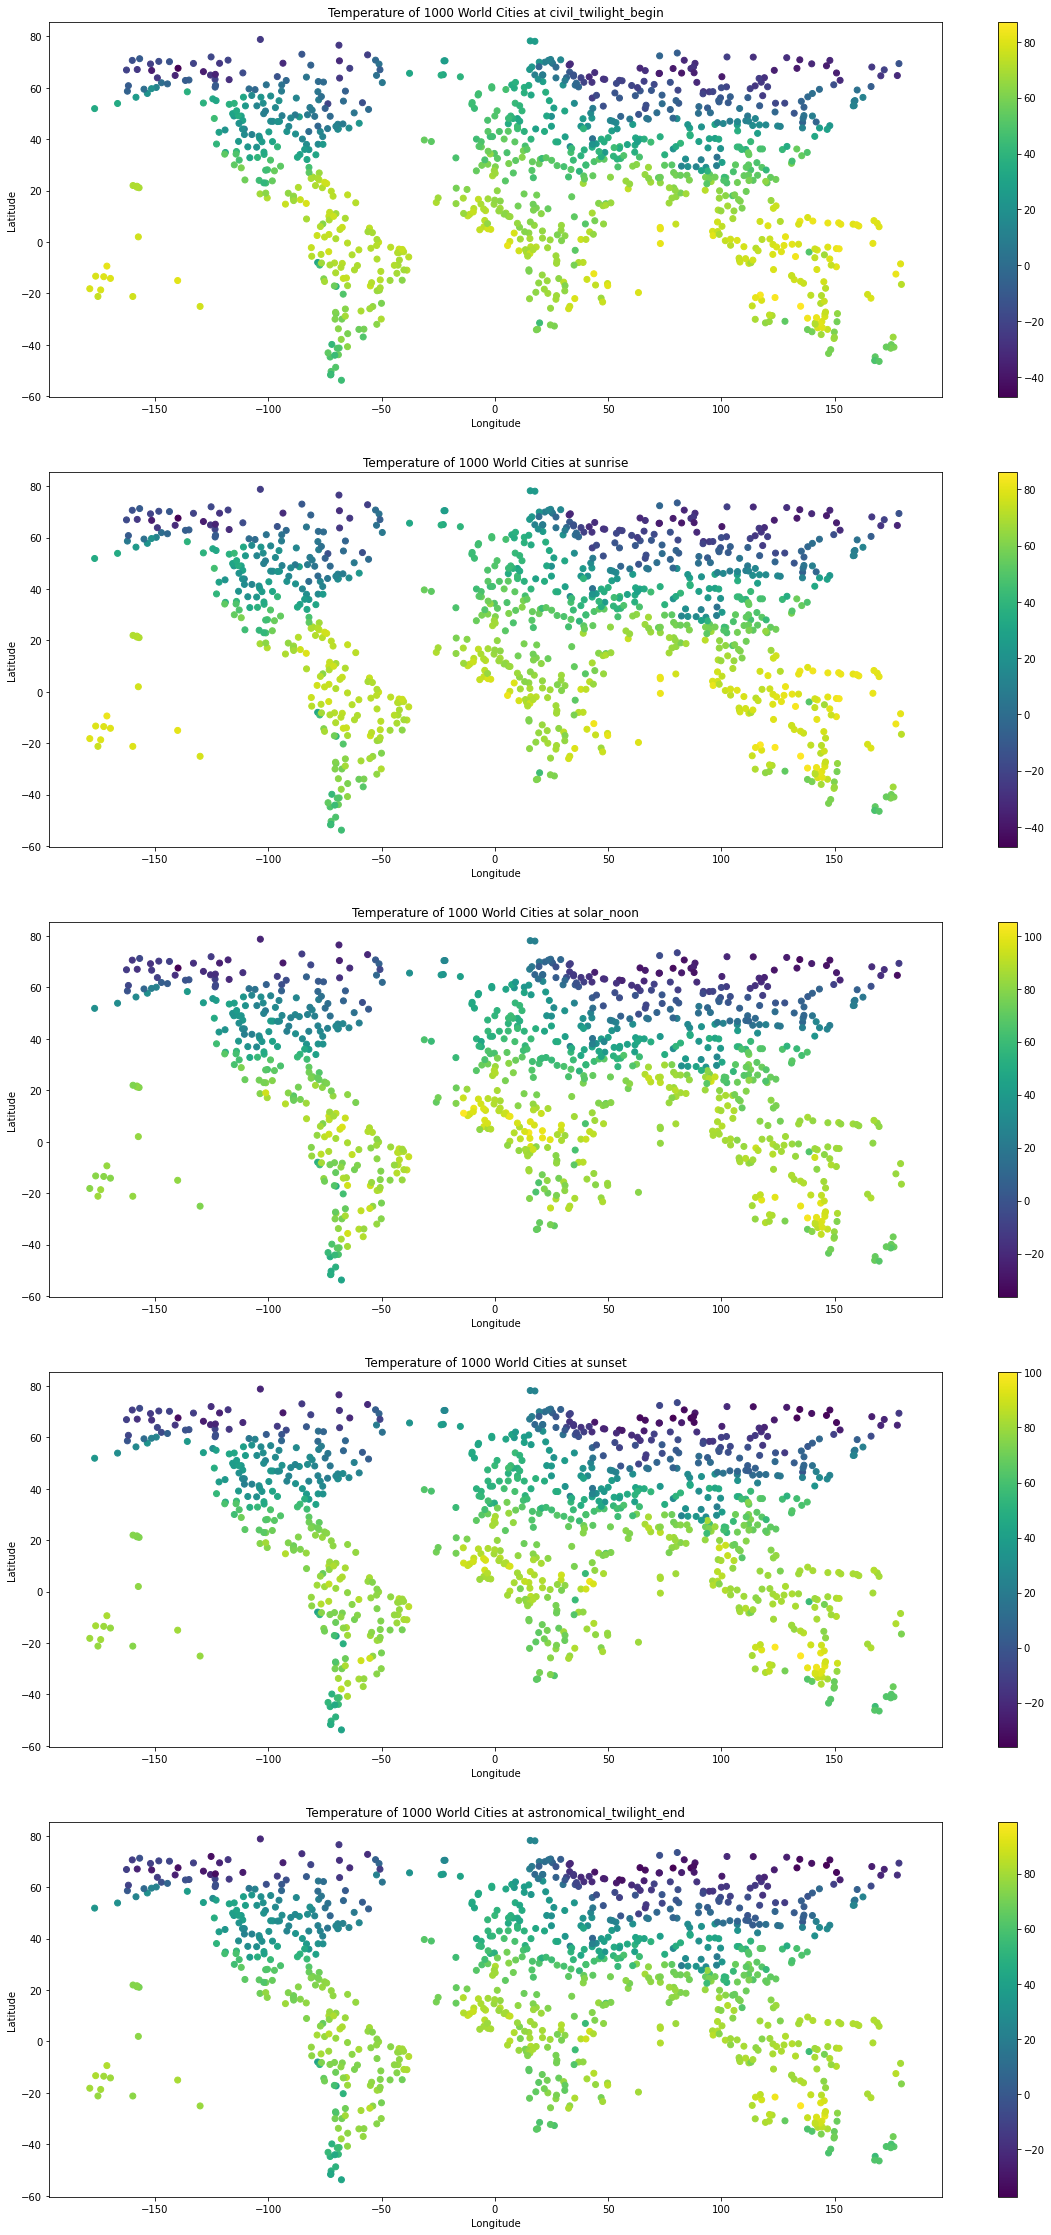

In [5]:
import matplotlib.pyplot as plt

j = len(sun_times)

i = -1

figure, axes = plt.subplots(j,1)
figure.set_size_inches(20, 40, forward=True)

for sun_time in sun_times:
    i = i + 1
    axes[i].set_title(f"Temperature of 1000 World Cities at {sun_time}")
    world = axes[i].scatter(weather_data[i][f"lon"],weather_data[i][f"lat"],c = weather_data[i][f"temp_{sun_time}"])
    axes[i].set_ylabel("Latitude")
    axes[i].set_xlabel("Longitude")
    plt.colorbar(world, ax = axes[i])



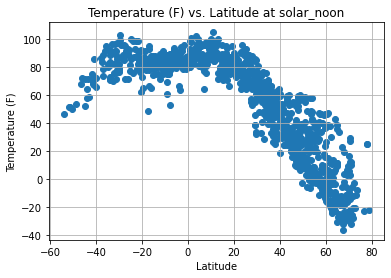

In [38]:

# i=0: civil twilight begin
# i=1: sunrise
# i=2: solarnoon
# i=3: sunset
# i=4: astronomical twilight end

i = 2
sun_time = sun_times[i]

plt.scatter(weather_data[i][f"lat"],weather_data[i][f"temp_{sun_time}"],marker="o")
#Incorporate the other graph properties
plt.title(f"Temperature (F) vs. Latitude at {sun_time}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("TempVsLat_solarnoon.png")
#show plot
plt.show()

In [ ]:
#This is a plot analyzing latitude vs. temperature. You can observe that maximal temperatures recorded are located near the equator and that temperature is discreasing on average as you move north or south of the equator.  

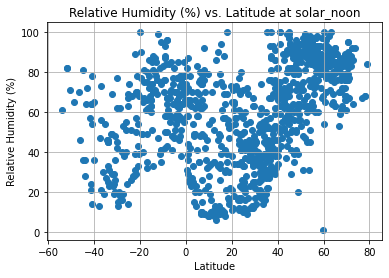

In [7]:
plt.scatter(weather_data[i][f"lat"],weather_data[i][f"hum_{sun_time}"],marker="o")
#Incorporate the other graph properties
plt.title(f"Relative Humidity (%) vs. Latitude at {sun_time}")
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("HumVsLat.png")
#show plot
plt.show()

In [ ]:
#This plot is analyzing latitude versus relative humidity. What we can observe from this plot is that relative humidity has more variance near the equator and signifcantly less variance as you move farther up north, and looks as though its clustering towards 100%. This is because at air loses its capacity to hold water at colder temperatures, thus reaching 100% saturation more quickly and precipating.

In [8]:
weather_data[i].loc[weather_data[i]["country"] == 'RU',:]

,city id,city,country,lat,lon,temp_solar_noon,hum_solar_noon,cloudiness_solar_noon,windiness_solar_noon
0,1493756,Razdolinsk,RU,58.4211,94.6658,-11.00,87,62,5.35
2,1489423,Tomskaya,RU,58.7844,64.1901,-9.26,88,99,6.24
8,1485020,Znamenskoye,RU,57.1281,73.8282,1.54,92,100,4.18
23,471308,Voyvozh,RU,62.8920,54.9635,-24.47,85,98,5.77
25,2014694,Tyrma,RU,50.0833,132.1667,8.91,89,96,3.89
...,...,...,...,...,...,...,...,...,...
938,494884,Shenkursk,RU,62.1091,42.8960,-16.26,86,30,3.91
952,6930874,Shikotan,RU,43.7999,146.7214,27.12,89,31,23.87
983,562245,Gadzhiyevo,RU,69.2551,33.3362,-11.20,77,0,6.71
986,2018436,Onokhoy,RU,51.9320,108.0747,6.80,47,20,11.18


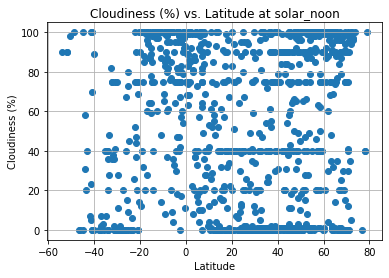

In [9]:
plt.scatter(weather_data[i][f"lat"],weather_data[i][f"cloudiness_{sun_time}"],marker="o")
#Incorporate the other graph properties
plt.title(f"Cloudiness (%) vs. Latitude at {sun_time}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("CloudinessVsLat.png")
#show plot
plt.show()

In [ ]:
#No discernable correlation between latitude and cloudiness. It appears as though most of the measurements were rounded to denominations of 20%.

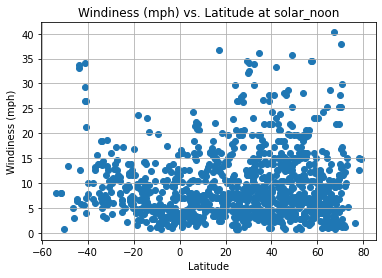

In [10]:
plt.scatter(weather_data[i][f"lat"],weather_data[i][f"windiness_{sun_time}"],marker="o")
#Incorporate the other graph properties
plt.title(f"Windiness (mph) vs. Latitude at {sun_time}")
plt.ylabel("Windiness (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WindinessVsLat.png")
#show plot
plt.show()

In [11]:
lats[0]

[58.4211,
 37.3344,
 58.7844,
 70.7342,
 70.1319,
 54.8002,
 -32.7075,
 15.25,
 57.1281,
 -18.7633,
 48.9,
 17.0432,
 -27.8333,
 58.4547,
 17.6167,
 -34,
 47.1667,
 70.7333,
 -40.7333,
 -1.3518,
 -1.8333,
 -21.8333,
 36.6,
 62.892,
 -40.9,
 50.0833,
 40.9333,
 9.0833,
 32.9312,
 -2.4431,
 -25.0269,
 -14,
 54.4933,
 47.9714,
 53.5501,
 52.1453,
 51.9678,
 45.55,
 64.3201,
 64.9308,
 49.002,
 -20.7333,
 62.9996,
 -3.7802,
 29.05,
 13.0942,
 10,
 -21.8667,
 60.3964,
 -21.2,
 73.5069,
 32.0738,
 9.5164,
 33.9622,
 -5.5569,
 36.1853,
 64.7806,
 63.8384,
 15.8794,
 21.6803,
 66.0764,
 8.1435,
 -33.3833,
 13.1667,
 8.0823,
 -10.8667,
 52.85,
 4.5361,
 -29.9847,
 56.0815,
 34.9402,
 20.4404,
 26.2833,
 48.1818,
 -14.6501,
 6.4598,
 68.0546,
 31.25,
 69.5372,
 54,
 26.2271,
 35.5,
 44.3,
 29.9667,
 -16.5,
 -1.8764,
 37.087,
 61.2906,
 61.9386,
 70.4846,
 11.2361,
 5.921,
 0.5005,
 28.1984,
 27.0003,
 48.9991,
 5.1033,
 32.1167,
 39.1255,
 4.1363,
 11.0204,
 38.1973,
 39.0261,
 32.7167,
 14.9192

In [17]:
#create a data frame
northern_weather_data = []
southern_weather_data = []

city_ids_N = []
cities_N = []
countries_N = []
lats_N = []
lons_N = []
temps_N = []
hums_N = []
clouds_N = []
winds_N = []

city_ids_S = []
cities_S = []
countries_S = []
lats_S = []
lons_S = []
temps_S = []
hums_S = []
clouds_S = []
winds_S = []


i = -1

for sun_time in sun_times:
    
    i = i + 1
    
    for j in range(len(lats[i])):
        
        if  lats[i][j] >= 0:
            
            city_ids_N.append([])
            city_ids_N[i].append(city_ids[i][j])
            cities_N.append([])
            cities_N[i].append(cities[i][j])
            countries_N.append([])
            countries_N[i].append(countries[i][j])
            lats_N.append([])
            lats_N[i].append(lats[i][j])
            lons_N.append([])
            lons_N[i].append(lons[i][j])
            temps_N.append([])
            temps_N[i].append(temps[i][j])
            hums_N.append([])
            hums_N[i].append(hums[i][j])
            clouds_N.append([])
            clouds_N[i].append(clouds[i][j])
            winds_N.append([])
            winds_N[i].append(winds[i][j])
        
        else: 
            
            city_ids_S.append([])
            city_ids_S[i].append(city_ids[i][j])
            cities_S.append([])
            cities_S[i].append(cities[i][j])
            countries_S.append([])
            countries_S[i].append(countries[i][j])
            lats_S.append([])
            lat = -1*lats[i][j]
            lats_S[i].append(lat)
            lons_S.append([])
            lons_S[i].append(lons[i][j])
            temps_S.append([])
            temps_S[i].append(temps[i][j])
            hums_S.append([])
            hums_S[i].append(hums[i][j])
            clouds_S.append([])
            clouds_S[i].append(clouds[i][j])
            winds_S.append([])
            winds_S[i].append(winds[i][j])
            
i = -1

for sun_time in sun_times:
    i = i + 1
    
    northern_weather_dict = {
        "city id": city_ids_N[i],
        "city": cities_N[i],
        "country" : countries_N[i],
        "lat" : lats_N[i],
        "lon" : lons_N[i],
        f"temp_{sun_time}" : temps_N[i],
        f"hum_{sun_time}" : hums_N[i],
        f"cloudiness_{sun_time}" : clouds_N[i],
        f"windiness_{sun_time}" : winds_N[i]
    
    }
         
    southern_weather_dict = {
        "city id": city_ids_S[i],
        "city": cities_S[i],
        "country" : countries_S[i],
        "lat" : lats_S[i],
        "lon" : lons_S[i],
        f"temp_{sun_time}" : temps_S[i],
        f"hum_{sun_time}" : hums_S[i],
        f"cloudiness_{sun_time}" : clouds_S[i],
        f"windiness_{sun_time}" : winds_S[i]    
        
    }
    
    northern_weather_data.append([])
    northern_weather_data[i] = northern_weather_dict
    northern_weather_data[i] = pd.DataFrame(northern_weather_data[i])
            
    southern_weather_data.append([])
    southern_weather_data[i] = southern_weather_dict
    southern_weather_data[i] = pd.DataFrame(southern_weather_data[i])        

# weather_data[4].head()

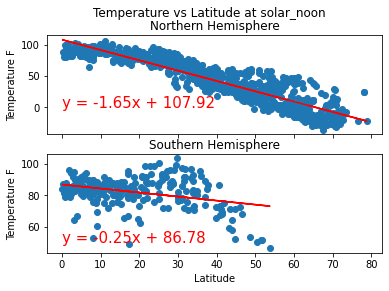

In [28]:
from scipy.stats import linregress

# i=0: civil twilight begin
# i=1: sunrise
# i=2: solarnoon
# i=3: sunset
# i=4: astronomical twilight end

i = 2

sun_time = sun_times[i]

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(f'Temperature vs Latitude at {sun_time}')

ax1.set_title("Northern Hemisphere")
ax1.set(ylabel = 'Temperature F')
x1_values = northern_weather_data[i]["lat"]
y1_values = northern_weather_data[i][f"temp_{sun_time}"]
(slope1,intercept1,rvalue1,pvalue1,stdev1) = linregress(x1_values,y1_values)
regress_values1 = x1_values*slope1 + intercept1
line_eq1 = "y = "+ str(round(slope1,2)) + "x + "+str(round(intercept1,2))
ax1.scatter(x1_values,y1_values)
ax1.plot(x1_values,regress_values1,color = "red")
ax1.annotate(line_eq1,(0,0),fontsize = 15,color = "red")

ax2.set_title("Southern Hemisphere")
ax2.set(xlabel = 'Latitude',ylabel = 'Temperature F')
x2_values = southern_weather_data[i]["lat"]
y2_values = southern_weather_data[i][f"temp_{sun_time}"]
(slope2,intercept2,rvalue2,pvalue2,stdev2) = linregress(x2_values,y2_values)
regress_values2 = x2_values*slope2 + intercept2
line_eq2 = "y = "+ str(round(slope2,2)) + "x + "+str(round(intercept2,2))
ax2.scatter(x2_values,y2_values)
ax2.plot(x2_values,regress_values2,color = "red")
ax2.annotate(line_eq2,(0,50),fontsize = 15,color = "red")

fig.savefig("TempVsLat_NS_Hems.png")



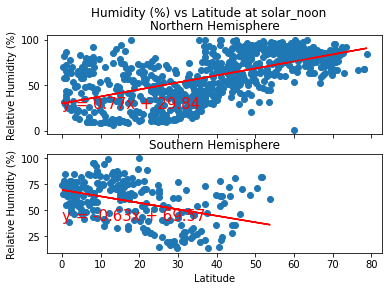

In [29]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(f'Humidity (%) vs Latitude at {sun_time}')

ax1.set_title("Northern Hemisphere")
ax1.set(ylabel = 'Relative Humidity (%)')
x1_values = northern_weather_data[i]["lat"]
y1_values = northern_weather_data[i][f"hum_{sun_time}"]
(slope1,intercept1,rvalue1,pvalue1,stdev1) = linregress(x1_values,y1_values)
regress_values1 = x1_values*slope1 + intercept1
line_eq1 = "y = "+ str(round(slope1,2)) + "x + "+str(round(intercept1,2))
ax1.scatter(x1_values,y1_values)
ax1.plot(x1_values,regress_values1,color = "red")
ax1.annotate(line_eq1,(0,25),fontsize = 15,color = "red")

ax2.set_title("Southern Hemisphere")
ax2.set(xlabel = 'Latitude',ylabel = 'Relative Humidity (%)')
x2_values = southern_weather_data[i]["lat"]
y2_values = southern_weather_data[i][f"hum_{sun_time}"]
(slope2,intercept2,rvalue2,pvalue2,stdev2) = linregress(x2_values,y2_values)
regress_values2 = x2_values*slope2 + intercept2
line_eq2 = "y = "+ str(round(slope2,2)) + "x + "+str(round(intercept2,2))
ax2.scatter(x2_values,y2_values)
ax2.plot(x2_values,regress_values2,color = "red")
ax2.annotate(line_eq2,(0,40),fontsize = 15,color = "red")

fig.savefig("HumVsLat_NS_Hems.png")

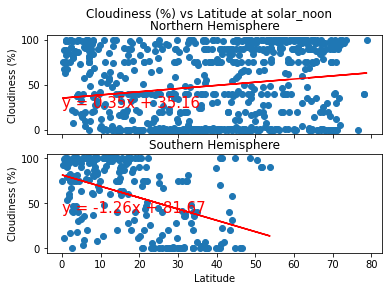

In [21]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(f'Cloudiness (%) vs Latitude at {sun_time}')

ax1.set_title("Northern Hemisphere")
ax1.set(ylabel = 'Cloudiness (%)')
x1_values = northern_weather_data[i]["lat"]
y1_values = northern_weather_data[i][f"cloudiness_{sun_time}"]
(slope1,intercept1,rvalue1,pvalue1,stdev1) = linregress(x1_values,y1_values)
regress_values1 = x1_values*slope1 + intercept1
line_eq1 = "y = "+ str(round(slope1,2)) + "x + "+str(round(intercept1,2))
ax1.scatter(x1_values,y1_values)
ax1.plot(x1_values,regress_values1,color = "red")
ax1.annotate(line_eq1,(0,25),fontsize = 15,color = "red")

ax2.set_title("Southern Hemisphere")
ax2.set(xlabel = 'Latitude',ylabel = 'Cloudiness (%)')
x2_values = southern_weather_data[i]["lat"]
y2_values = southern_weather_data[i][f"cloudiness_{sun_time}"]
(slope2,intercept2,rvalue2,pvalue2,stdev2) = linregress(x2_values,y2_values)
regress_values2 = x2_values*slope2 + intercept2
line_eq2 = "y = "+ str(round(slope2,2)) + "x + "+str(round(intercept2,2))
ax2.scatter(x2_values,y2_values)
ax2.plot(x2_values,regress_values2,color = "red")
ax2.annotate(line_eq2,(0,40),fontsize = 15,color = "red")

fig.savefig("CloudVsLat_NS_Hems.png")

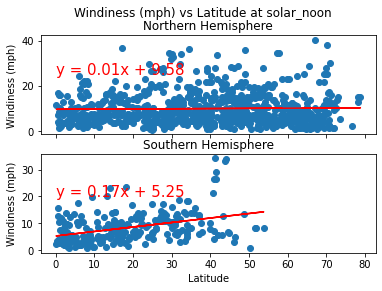

In [30]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(f'Windiness (mph) vs Latitude at {sun_time}')

ax1.set_title("Northern Hemisphere")
ax1.set(ylabel = 'Windiness (mph)')
x1_values = northern_weather_data[i]["lat"]
y1_values = northern_weather_data[i][f"windiness_{sun_time}"]
(slope1,intercept1,rvalue1,pvalue1,stdev1) = linregress(x1_values,y1_values)
regress_values1 = x1_values*slope1 + intercept1
line_eq1 = "y = "+ str(round(slope1,2)) + "x + "+str(round(intercept1,2))
ax1.scatter(x1_values,y1_values)
ax1.plot(x1_values,regress_values1,color = "red")
ax1.annotate(line_eq1,(0,25),fontsize = 15,color = "red")

ax2.set_title("Southern Hemisphere")
ax2.set(xlabel = 'Latitude',ylabel = 'Windiness (mph)')
x2_values = southern_weather_data[i]["lat"]
y2_values = southern_weather_data[i][f"windiness_{sun_time}"]
(slope2,intercept2,rvalue2,pvalue2,stdev2) = linregress(x2_values,y2_values)
regress_values2 = x2_values*slope2 + intercept2
line_eq2 = "y = "+ str(round(slope2,2)) + "x + "+str(round(intercept2,2))
ax2.scatter(x2_values,y2_values)
ax2.plot(x2_values,regress_values2,color = "red")
ax2.annotate(line_eq2,(0,20),fontsize = 15,color = "red")

fig.savefig("WindVsLat_NS_Hems.png")

In [23]:
import os

path=r'C:\Users\15037\Desktop\python-api-challenge\VacationPy\output_weatherdata'

i = 0
for sun_time in sun_times:
    weather_data[i].to_csv(os.path.join(path,f"weather_data_{sun_time}.csv"),index = None)
    i = i + 1